In [ ]:
# pip3 install pillow
# pip3 install requests
# pip3 install torch torchvision torchaudio
# pip3 install transformers
# pip3 install bitsandbytes
# pip3 install flash-attn --no-build-isolation

In [1]:
import requests
from PIL import Image

import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [2]:
model_id = "llava-hf/bakLlava-v1-hf"
saved_model_path = "LLava_Model_weights/bakLlava-v1-hf"

In [3]:
prompt = "USER: <image>\nWhat are these?\nASSISTANT:"
image_file = "http://images.cocodataset.org/val2017/000000039769.jpg"

In [6]:
model = LlavaForConditionalGeneration.from_pretrained(
    saved_model_path, 
    torch_dtype=torch.float16, 
    device_map="auto",
    low_cpu_mem_usage=True, 
    load_in_4bit=True,
    attn_implementation="flash_attention_2",
#     force_download=True,
#     resume_download=False
)

You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
processor = AutoProcessor.from_pretrained(saved_model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [12]:
# model.save_pretrained(saved_model_path)
# processor.save_pretrained(saved_model_path)

In [15]:
image_file = "https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.parkerpawn.com%2Fwp-content%2Fuploads%2F2023%2F08%2Felectronic-gadgets.jpeg&tbnid=DyLldZH5synJhM&vet=12ahUKEwjp9qya152DAxW-micCHVlaCgQQMygKegUIARCHAQ..i&imgrefurl=https%3A%2F%2Fwww.parkerpawn.com%2F2023%2F08%2F14%2Felevate-your-student-experience-essential-electronics-available-at-parker-pawn%2F&docid=NLpmlFpJNzw-WM&w=680&h=408&q=electronics&ved=2ahUKEwjp9qya152DAxW-micCHVlaCgQQMygKegUIARCHAQ"

In [10]:
raw_image = Image.open(requests.get(image_file, stream=True).raw)
inputs = processor(prompt, raw_image, return_tensors='pt').to(0, torch.float32)

In [11]:
output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

ER:  
What are these?
ASSISTANT: Cats


In [12]:
def run_inference(raw_image, user_input):
    prompt = f"USER: <image>\n{user_input}\nASSISTANT:"
    inputs = processor(prompt, raw_image, return_tensors='pt').to(0, torch.float32)
    output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
    return processor.decode(output[0][2:], skip_special_tokens=True)

In [19]:
image_file = "https://saraisilkroutehotel.com/wp-content/uploads/2020/10/WINTER-PASSU-HUNZA-720x350.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

Write your Prompt here: describe the image


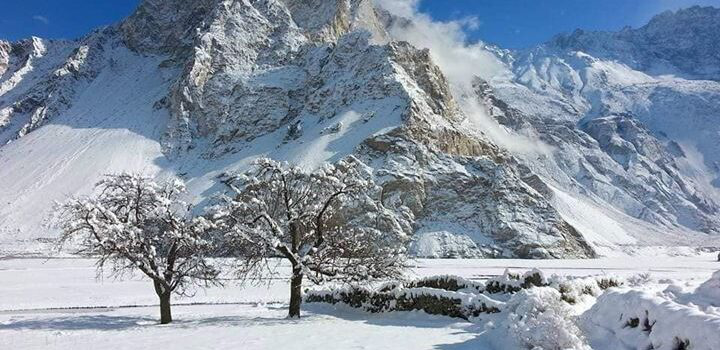

ER:  
describe the image
ASSISTANT: The image features a snow-covered landscape with a large, rocky mountain in the background. A small tree is the focal point of the scene, surrounded by a thick blanket of snow. The tree is covered in snow, and its branches are weighed down by the snow, giving it a unique and beautiful appearance. The snowy field extends around the tree, covering the entire area in a layer of snow, which enhances the serene and picturesque atmosphere of the scene.
Write your Prompt here: i am planning a tour to this location. Tell me what clothes should i pack?


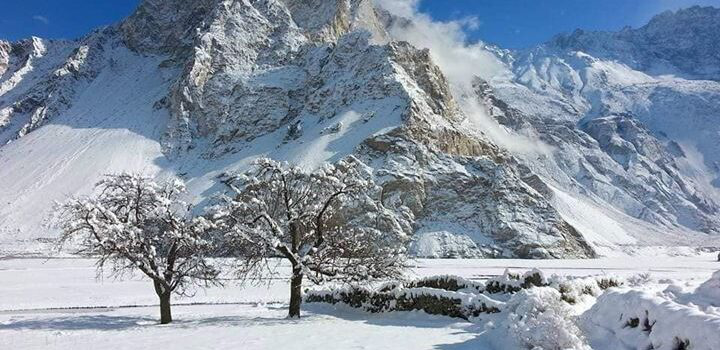

ER:  
i am planning a tour to this location. Tell me what clothes should i pack?
ASSISTANT: Given the snowy conditions in the image, it is essential to pack warm and weather-resistant clothing for a tour in such an environment. Some specific clothing items to consider bringing are a heavy-duty winter coat, insulated snow pants, waterproof and insulated snow boots, warm gloves, a hat, and a scarf. Additionally, it is advisable to pack some layers for flexibility, as well as a good pair of binoculars for enjoying the beautiful snow-covered mountain views. Don't forget to pack a sturdy, waterproof backpack to carry all the essentials and some extra clothing, as the weather can change rapidly in mountainous areas.
Write your Prompt here: q


In [20]:
while True:
    user_input = input('Write your Prompt here: ')
    if user_input == "q":
        break
    else:
        display(raw_image)
        print(run_inference(raw_image, user_input))